<a href="https://colab.research.google.com/github/Kevokali/Kelvin-Techie-Kirui/blob/main/Transfer_Learning_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Workflow;
 Dataset - Image Processing - Train Test Split - Pretrained MobileNet Model

In [4]:
#configuring kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the dataset from kaggle

In [ ]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset
!unzip microsoft-catsvsdogs-dataset.zip -d /content/cats-vs-dogs

In [15]:
import os
path, dirs, files = next(os.walk('/content/cats-vs-dogs/PetImages/Cat'))
file_count = len(files)
print('Number of files: ', file_count)

Number of files:  12501


In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import tensorflow as tf


In [13]:
#Printing the name of images
file_names = os.listdir("/content/cats-vs-dogs/PetImages/Cat")
print(file_names)

['6491.jpg', '8880.jpg', '9133.jpg', '8049.jpg', '739.jpg', '1258.jpg', '8358.jpg', '10788.jpg', '7094.jpg', '4003.jpg', '7699.jpg', '8665.jpg', '6010.jpg', '7664.jpg', '7482.jpg', '96.jpg', '8771.jpg', '7945.jpg', '8331.jpg', '4371.jpg', '4077.jpg', '8436.jpg', '70.jpg', '11144.jpg', '7976.jpg', '8793.jpg', '3505.jpg', '9762.jpg', '11982.jpg', '379.jpg', '9151.jpg', '5999.jpg', '4935.jpg', '1610.jpg', '7373.jpg', '11780.jpg', '855.jpg', '11674.jpg', '7030.jpg', '11388.jpg', '1469.jpg', '91.jpg', '2637.jpg', '8614.jpg', '5333.jpg', '10440.jpg', '6565.jpg', '8046.jpg', '9278.jpg', '6517.jpg', '5481.jpg', '11484.jpg', '6014.jpg', '2002.jpg', '6040.jpg', '5836.jpg', '8957.jpg', '1326.jpg', '2978.jpg', '11059.jpg', '1575.jpg', '6222.jpg', '999.jpg', '1412.jpg', '8729.jpg', '8216.jpg', '12013.jpg', '1441.jpg', '5601.jpg', '1327.jpg', '6587.jpg', '9193.jpg', '12200.jpg', '329.jpg', '11630.jpg', '2163.jpg', '6167.jpg', '495.jpg', '933.jpg', '4387.jpg', '1295.jpg', '4488.jpg', '5528.jpg', '877

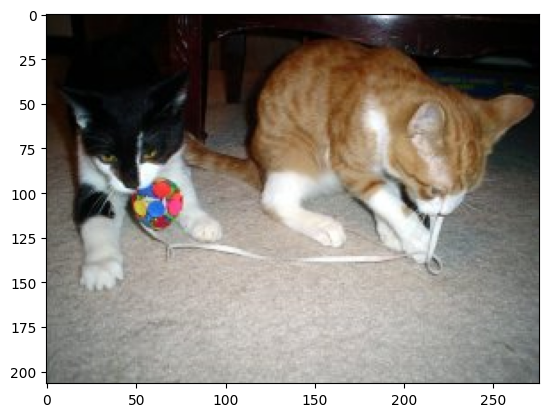

In [14]:
#display any image

img = mpimg.imread('/content/cats-vs-dogs/PetImages/Cat/6491.jpg')
imgplot = plt.imshow(img)
plt.show()


In [19]:
original_cat_folder = '/content/cats-vs-dogs/PetImages/Cat/'
resized_cat_folder ='/content/Resized/Cat_resized/'
original_dog_folder = '/content/cats-vs-dogs/PetImages/Dog'
resized_dog_folder ='/content/Resized/Dog_resized'

def resize_images(original_folder, resized_folder, num_images):
    files = [f for f in os.listdir(original_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    files = files[:num_images]  # Take only the first `num_images` files

    for file in files:
        try:
            img_path = os.path.join(original_folder, file)
            img = Image.open(img_path)
            img = img.resize((224, 224))
            img = img.convert('RGB')

            new_img_path = os.path.join(resized_folder, file)
            img.save(new_img_path)

        except Exception as e:
            print(f"Error resizing {file}: {e}")

    print(f"Resized {len(files)} images and saved to '{resized_folder}'")

# Resize 1000 cat and dog images
resize_images(original_cat_folder, resized_cat_folder, 1000)
resize_images(original_dog_folder, resized_dog_folder, 1000)

✅ Resized 1000 images and saved to '/content/Resized/Cat_resized/'
✅ Resized 1000 images and saved to '/content/Resized/Dog_resized'


In [ ]:
#Confirming the number of images in resized folder
path, dirs, files = next(os.walk('/content/Resized/Cat_resized'))
file_count = len(files)
print('Number of files: ', file_count)


#Printing some names of the images, so that you can display one image
file_names = os.listdir("/content/Resized/Cat_resized")
print(file_names)

#I had forgotten the use of f string but i made it
img = mpimg.imread(f'/content/Resized/Cat_resized/{file_names[1]}')
imgplot = plt.imshow(img)
plt.show()



In [ ]:
#another way

def check_and_display_images(folder_path):
    # Confirm the number of files
    path, dirs, files = next(os.walk(folder_path))
    file_count = len(files)
    print(f"Number of files in '{folder_path}': {file_count}")

    if file_count == 0:
        print("No files found!")
        return

    # Print some file names
    file_names = os.listdir(folder_path)
    print("First 10 files:", file_names[:10])

    # Display one image (if available)
    try:
        img = mpimg.imread(f"{folder_path}/{file_names[1]}")
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Sample image from {folder_path}")
        plt.show()
    except Exception as e:
        print(f" Error displaying image: {e}")

# Call function for Cats and Dogs
check_and_display_images('/content/Resized/Cat_resized')
check_and_display_images('/content/Resized/Dog_resized')


Labelling the Data
 cats - 0
 dogs - 1

In [24]:
import tensorflow as tf

# Paths to the resized data
data_dir = '/content/Resized'

batch_size = 32
img_size = (224, 224)

# Load the dataset from the directory
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    label_mode='int',  # Labels will be integers (Cats=0, Dogs=1)
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

# Split into train, test, and validation sets
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size + val_size)

normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

# Optimize dataset loading
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# Confirm the shape and labels
for images, labels in train_dataset.take(1):
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")
    print(f"Sample labels: {labels.numpy()}")  # Should show 0s and 1s


Found 2000 files belonging to 2 classes.
Image batch shape: (32, 224, 224, 3)
Label batch shape: (32,)
Sample labels: [0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0]


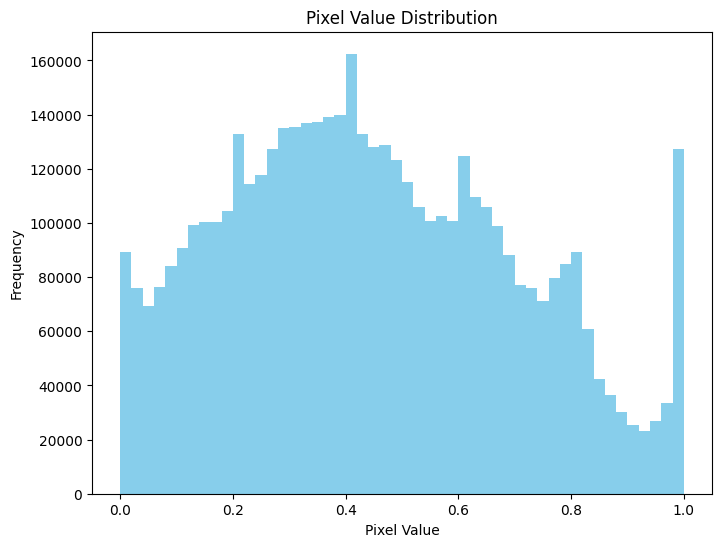

In [40]:
import numpy as np

for images, _ in train_dataset.take(1):
    pixel_values = images.numpy().flatten()

plt.figure(figsize=(8, 6))
plt.hist(pixel_values, bins=50, color='skyblue')
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


 Pixel values of a batch from the train_dataset

In [ ]:
for images, labels in train_dataset.take(1):
    print(images[0].numpy())  # Print pixel values of the first image in the batch
    print(f"Label: {labels[0].numpy()}")  # Print the corresponding label

for images, labels in train_dataset.take(1):
    plt.imshow(images[0].numpy())
    plt.show()
    print(images[0].numpy())  # Matrix of pixel values

Building the Neural Network

In [33]:
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)


In [36]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,  # Exclude the classifier layer
    weights='imagenet'
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [37]:
# Freeze the base model to avoid updating the weights during training
base_model.trainable = False

# Build the model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_acc:.4f}')

# Confirm the shape and labels
for images, labels in train_dataset.take(1):
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")
    print(f"Sample labels: {labels.numpy()}")

Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.8783 - loss: 0.3401 - val_accuracy: 0.9444 - val_loss: 0.1581
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9826 - loss: 0.0892 - val_accuracy: 0.9549 - val_loss: 0.1236
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.9808 - loss: 0.0770 - val_accuracy: 0.9757 - val_loss: 0.0776
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9848 - loss: 0.0555 - val_accuracy: 0.9757 - val_loss: 0.0768
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9900 - loss: 0.0494 - val_accuracy: 0.9722 - val_loss: 0.0762
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9713 - loss: 0.0908
Test Accuracy: 0.9704
Image batch shape: (32, 224, 224, 3)
Label batch shape: (32,)
Sample labels: [1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1]


Training and Validation Accuracy

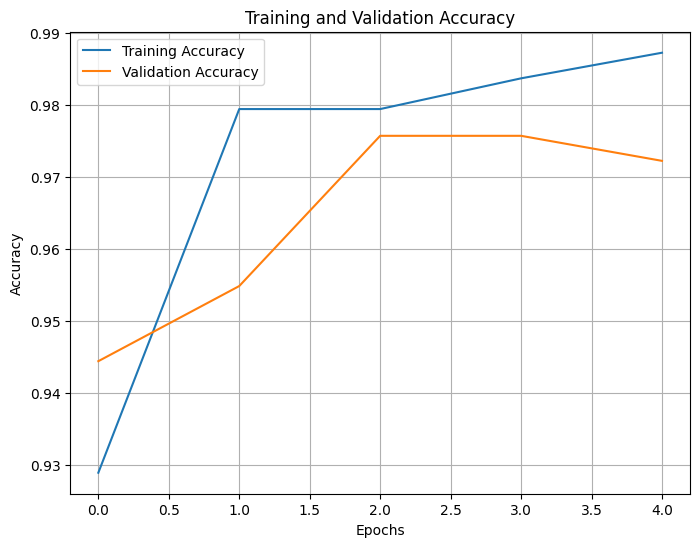

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


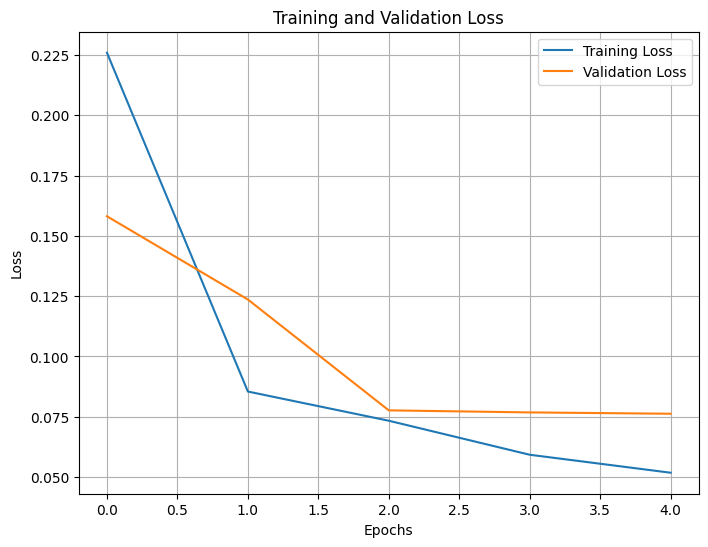

In [42]:
#training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


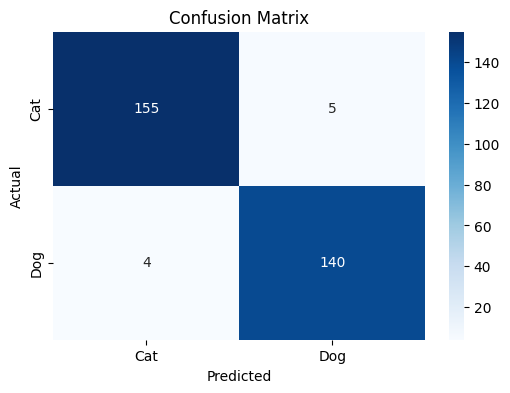

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get true labels and predictions
y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend((preds > 0.5).astype(int).flatten())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
